In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras import optimizers

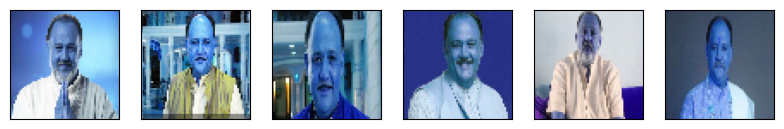

In [12]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(64,64))
            images.append(img1)
    return images
#Load the images
allu_arjun=load_images_from_folder("D:\\Programming\\Project\\data\\allu arjun")
akshaey_khanna=load_images_from_folder("D:\\Programming\\Project\\data\\akshaey khanna")
alok_nath=load_images_from_folder("D:\\Programming\\Project\\data\\alok nath")
train_allu_arjun = np.array(allu_arjun)
train_akshaey_khanna = np.array(akshaey_khanna)
train_alok_nath= np.array(alok_nath)
#Visualize the images 
fig = plt.figure(figsize=(20,5))
for i in range(6):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(alok_nath[i]))

In [13]:
train_allu_arjun_label=np.zeros(len(train_allu_arjun))
train_akshaey_khanna_label=np.ones(len(train_akshaey_khanna))
train_alok_nath_label=np.full(len(train_alok_nath),2)

print(train_allu_arjun.shape,train_allu_arjun_label.shape)
print(train_akshaey_khanna.shape,train_akshaey_khanna_label.shape)
print(train_alok_nath.shape,train_alok_nath_label.shape)

(6, 64, 64, 3) (6,)
(6, 64, 64, 3) (6,)
(6, 64, 64, 3) (6,)


In [14]:
#Concatenate 
X=np.concatenate((train_allu_arjun,train_akshaey_khanna,train_alok_nath))
y=np.concatenate((train_allu_arjun_label,train_akshaey_khanna_label,train_alok_nath_label))
y_label =to_categorical(y)
#Train -Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.33, random_state=42,shuffle=True)
#Normalize the data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (12, 64, 64, 3)
Testing Data (6, 64, 64, 3)


In [23]:
#HyperParameters
batch_size = 64
epochs = 20
num_classes = 3
input_shape=(64,64,3)
#Model Define
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

c:\Users\NAMAGIRI TEJASRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\NAMAGIRI TEJASRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,339 (4.36 MB)

 Trainable params: 1,142,339 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
np.random.seed(42)
model_1=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64,shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4167 - loss: 1.0850 - val_accuracy: 0.1667 - val_loss: 2.8915
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4167 - loss: 1.0087 - val_accuracy: 0.1667 - val_loss: 2.2538
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4167 - loss: 1.0114 - val_accuracy: 0.1667 - val_loss: 1.3100
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8333 - loss: 0.8009 - val_accuracy: 0.1667 - val_loss: 1.2650
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8333 - loss: 0.7490 - val_accuracy: 0.1667 - val_loss: 1.4857
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8333 - loss: 0.6225 - val_accuracy: 0.1667 - val_loss: 1.6304
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9167 - loss: 0.4628 - val_accuracy: 0.0000e+00 - val_loss: 1.6870
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9167 - loss: 0.3387 - val_accuracy: 0.0000e+00 - val_loss

Test loss: 11.942049980163574
Test accuracy: 0.1666666716337204


Text(0.5, 1.0, 'Training and validation loss')

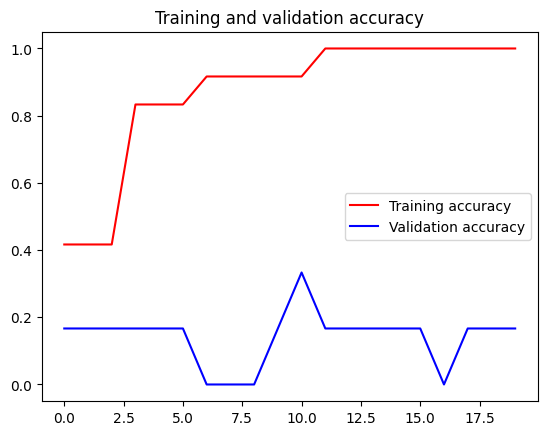

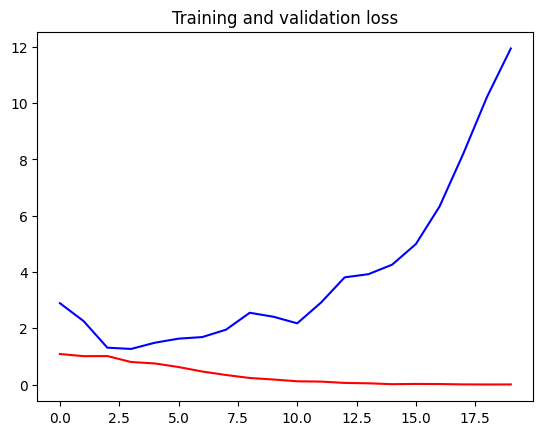

In [25]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [26]:
from sklearn.metrics import confusion_matrix
y_test_pred=model.predict(X_test)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
cnf_matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0, 0, 4],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


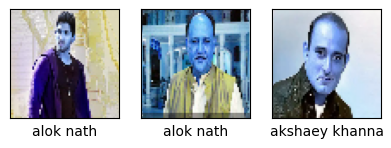

In [28]:
testdata= load_images_from_folder("D:\\Programming\\Project\\test")
testimages=np.array(testdata)
predicted_classes = model.predict(testimages)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
#Visualize the test data
fig = plt.figure(figsize=(20,5))
for i in range(3):
    ax = fig.add_subplot(3, 12, i+1,xticks=[], yticks=[])
    plt.imshow(testimages[i])
    if (predicted_classes1[i]==0):
        plt.xlabel('allu arjun')
    if (predicted_classes1[i]==1):
        plt.xlabel('akshaey khanna')
    if (predicted_classes1[i]==2):
        plt.xlabel('alok nath')    
plt.show()